# Google Play Store Apps

**Author Name:** Moafia Arif

**Email:** moafiaarif@gmail.com

**Source:** https://www.kaggle.com/datasets/lava18/google-play-store-apps

## Complete EDA analysis for Practice

## About DataSet
>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
  While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
- `Content`
 Each app (row) has values for catergory, rating, size, and more.
 - `Acknowledgements`
  This information is scraped from the Google Play Store. This app information would not be available without it.
- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Data Loading and Exploration | Cleaning

- Load csv

In [2]:
df=pd.read_csv("googleplaystore.csv")

- See top 5 rows of csv

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


- To view maximum columns and rows

In [4]:
# set options to be maximum for rows and columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore') 

- View the names of columns of Google Play store

In [5]:
print(" The columns of this dataset are",df.columns)

 The columns of this dataset are Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


- See total rows and columns of dataset

In [6]:
# df.shape is tuple and it has indexed 0 and 1
print(f"The number of rows are {df.shape[0]} and the number of columns are {df.shape[1]}.")

The number of rows are 10841 and the number of columns are 13.


- Get the info about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


- Check the statistics of dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.191513,5.157352e-01,1.0,4.0,4.3,4.5,5.0
Reviews,10841.0,444111.928051,2.927629e+06,0.0,38.0,2094.0,54768.0,78158306.0


# make size a numeric column

In [9]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### Observe
  Size is not in same unit

  1. Varies with device
  2. M
  3. k

- Check is any missing value

In [11]:
df['Size'].isnull().sum()

0

- Data has no null values

In [12]:
#count the rows that have "varies with device"
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [13]:
# find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [14]:
# find the values having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [15]:
def convert_to_bytes(x):
    if isinstance(x, str): #check if x is a string 
       if 'M' in x:
           x = x.replace('M', '')
           x = float(x)
           return x * 1024 * 1024
       elif 'k' in x:
              x = x.replace('k', '')
              x = float(x)
              return x * 1024
       elif 'Varies with device' in x:
            return np.nan
    return x    #If x is not a string or none of the conditions above match, the function simply returns x without any conversion.
    
#do in 1 line 
#if 'k' in size:
    #return float(size.replace('k', "")) * 1024


In [16]:
# Apply the function to size column
df['Size']=df['Size'].apply(convert_to_bytes)

In [17]:
df['Size']

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10841, dtype: float64

In [18]:
# rename  the column
df.rename(columns={'Size':'size_in_bytes'}, inplace=True)

In [19]:
df.head()

,App,Category,Rating,Reviews,size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [20]:
# add new column and convert size_in_bytes to size in MB
df['Size_in_MB']=df['size_in_bytes'].apply(lambda x: x/(1024*1024))

In [21]:
# add new column and convert size_in_bytes to size in KB
df['Size_in_KB']=df['size_in_bytes'].apply(lambda x: x/(1024))

In [22]:
df.head()

,App,Category,Rating,Reviews,size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,2867.2


In [23]:
# check %age of null values in size col
df['size_in_bytes'].isnull().sum()/len(df)*100

15.635089013928605

- Since it has only 15% null values.I am immputing it by mean of value

In [24]:
df['size_in_bytes'].fillna(df['size_in_bytes'].mean(), inplace=True)

In [25]:
df['size_in_bytes'].isnull().sum()

0

In [26]:
# check %age of null values in size_in_KB col
df['Size_in_KB'].isnull().sum()/len(df)*100

15.635089013928605

In [27]:
df['Size_in_KB'].fillna(df['Size_in_KB'].mean(),inplace=True)

In [28]:
df['Size_in_KB'].isnull().sum()

0

In [29]:
# check %age of null values in size_in_MB col
df['Size_in_MB'].isnull().sum()/len(df)*100

15.635089013928605

In [30]:
df['Size_in_MB'].fillna(df['Size_in_KB'].mean(),inplace=True)

In [31]:
df['Size_in_MB'].isnull().sum()

0

> I'm done with Rating, reviews , size in bytes, in Kb, and in MB's

- Next step is to explore next columns

# Explore Install Column

In [32]:
df['Installs'].isnull().sum()

0

In [33]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

# Observe on Install Columns
1. Remove +sign 
2. Convert it to integer
3. Remove ,

In [34]:
df['Installs']=df['Installs'].apply(
    lambda x: x.replace('+','') if '+' in str(x) else x
)

In [35]:
df['Installs']=df['Installs'].apply(
    lambda x: x.replace(',','') if ',' in str(x) else x
)

In [36]:
df['Installs']=df['Installs'].astype(int)

In [37]:
df['Installs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
10841 non-null  int32
dtypes: int32(1)
memory usage: 42.5 KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.191513e+00,5.157352e-01,1.000000,4.0,4.3,4.5,5.000000e+00
Reviews,10841.0,4.441119e+05,2.927629e+06,0.000000,38.0,2094.0,54768.0,7.815831e+07
size_in_bytes,10841.0,2.255921e+07,2.175544e+07,8704.000000,6186598.4,18874368.0,27262976.0,1.048576e+08
Installs,10841.0,1.546291e+07,8.502557e+07,0.000000,1000.0,100000.0,5000000.0,1.000000e+09
Size_in_MB,10841.0,3.462636e+03,7.993781e+03,0.008301,5.9,18.0,52.0,2.203048e+04
Size_in_KB,10841.0,2.203048e+04,2.124555e+04,8.500000,6041.6,18432.0,26624.0,1.024000e+05


# Price Column

In [39]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$19.90         1
$1.75          1
$14.00         1
$4.85          1
$1.04          1
Name: count, Length: 92, dtype: int64

## Observe
1. Remove $
2. Convert float

In [40]:
# Observe how many rows have $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [41]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[df['Price'].str.contains('0')].value_counts().sum() & df['Price'].loc[~df['Price'].str.contains('\$')].value_counts().sum()

10032

In [42]:
# Remove $ sign
df['Price']=df['Price'].apply(
    lambda x: x.replace('$','') if '$' in str(x) else x
)

In [43]:
# Convert Price column to float
df['Price']=df['Price'].astype(float)


In [44]:
df.describe()

,Rating,Reviews,size_in_bytes,Installs,Price,Size_in_MB,Size_in_KB
count,9367.000000,1.084100e+04,1.084100e+04,1.084100e+04,10841.000000,10841.000000,10841.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,3462.635592,22030.480308
std,0.515735,2.927629e+06,2.175544e+07,8.502557e+07,15.948971,7993.780928,21245.551287
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,6.186598e+06,1.000000e+03,0.000000,5.900000,6041.600000
50%,4.300000,2.094000e+03,1.887437e+07,1.000000e+05,0.000000,18.000000,18432.000000
75%,4.500000,5.476800e+04,2.726298e+07,5.000000e+06,0.000000,52.000000,26624.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,22030.480308,102400.000000


In [45]:
# using f string print min, max and average prices of the app
print(f"The minimum price is {df['Price'].min()}")
print(f"The maximum price is {df['Price'].max()}")
print(f"The averag price is {df['Price'].mean()}")

The minimum price is 0.0
The maximum price is 400.0
The averag price is 1.0272733142699015


# Missing Values

In [46]:
# find missing values
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
size_in_bytes        0
Installs             0
Price                0
Content Rating       0
Last Updated         0
Size_in_MB           0
Size_in_KB           0
dtype: int64

In [47]:
# find missing value percentage in th data
df.isnull().sum().sort_values(ascending=False)/len(df)*100
# round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending=False) ->round upto 2 decimal

Rating            13.596532
Current Ver        0.073794
Android Ver        0.018448
Category           0.009224
Type               0.009224
Genres             0.009224
App                0.000000
Reviews            0.000000
size_in_bytes      0.000000
Installs           0.000000
Price              0.000000
Content Rating     0.000000
Last Updated       0.000000
Size_in_MB         0.000000
Size_in_KB         0.000000
dtype: float64

<Axes: >

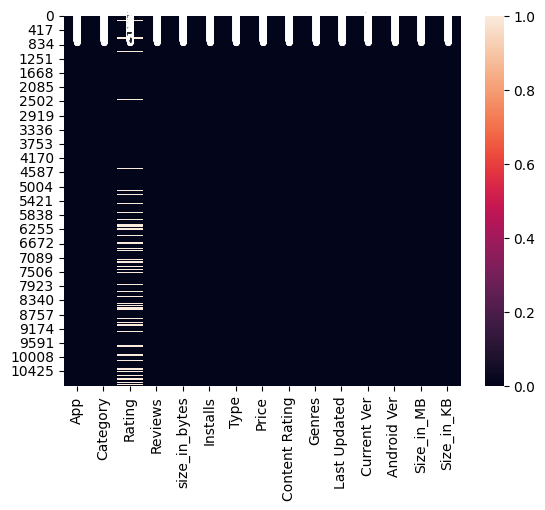

In [48]:
# plot missing values
sns.heatmap(df.isnull(), annot=True)

# Impute Missing values

In [49]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [50]:
df['Genres'] = df['Genres'].fillna(df['Genres'].mode()[0])  # Filling with the first mode value

In [51]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [52]:
def convert(x):
    if isinstance(x, str): #check if x is a string 
       if '10+' in x:
           return x.replace('10+', '')
       elif '17+' in x:
              return x.replace('17+', '')
       elif '18+' in x:
              return x.replace('18+', '')
    return x  

In [53]:
df['Content Rating']=df['Content Rating'].apply(convert)

In [54]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone ', 'Mature ', 'Adults only ',
       'Unrated'], dtype=object)

In [55]:
df['Content Rating'].isnull().sum()

0

In [56]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [57]:
def convert_Android(x):
    if isinstance(x, str): #check if x is a string 
       if 'W' in x:
           return x.replace('W', '')
       elif '- 7.1.1' in x:
              return x.replace('- 7.1.1', 'and up')
       elif '- 8.0' in x:
              return x.replace('- 8.0', 'and up')
       elif '- 6.0' in x:
              return x.replace('- 6.0', 'and up')
       elif 'Varies with device' in x:
              return np.nan
    return x  

In [58]:
df['Android Ver']=df['Android Ver'].apply(convert_Android)

In [59]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up', nan,
       '2.2 and up', '5.0 and up', '6.0 and up', '1.6 and up',
       '1.5 and up', '2.1 and up', '7.0 and up', '5.1 and up',
       '4.3 and up', '2.0 and up', '3.2 and up', '7.1 and up',
       '8.0 and up', '3.1 and up', '2.0.1 and up', '1.0 and up'],
      dtype=object)

In [60]:
df['Android Ver'].isnull().sum()/len(df)*100

12.581865141592106

In [61]:
df['Android Ver']=df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [62]:
df['Android Ver'].isnull().sum()

0

In [63]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
size_in_bytes        0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
Size_in_MB           0
Size_in_KB           0
dtype: int64

In [64]:
df.head()

,App,Category,Rating,Reviews,size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Size_in_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,2867.2


In [65]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [66]:
df['Type']=df['Type'].fillna(df['Type'].mode()[0])

In [67]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [68]:
#Already check above only 1 1 value is missing in each column
df['Category']=df['Category'].fillna(df['Category'].mode()[0])

In [69]:
# rating %age is already caclualted which is about 13% we can impute it
df['Rating']=df['Rating'].astype(float)

In [70]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [71]:
df.isnull().sum()
 

App               0
Category          0
Rating            0
Reviews           0
size_in_bytes     0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
Size_in_MB        0
Size_in_KB        0
dtype: int64

In [72]:
# Droping Current Ver Column, It has miscallenous data which will affect predictions
df.drop('Current Ver', axis=1, inplace=True)

<Axes: >

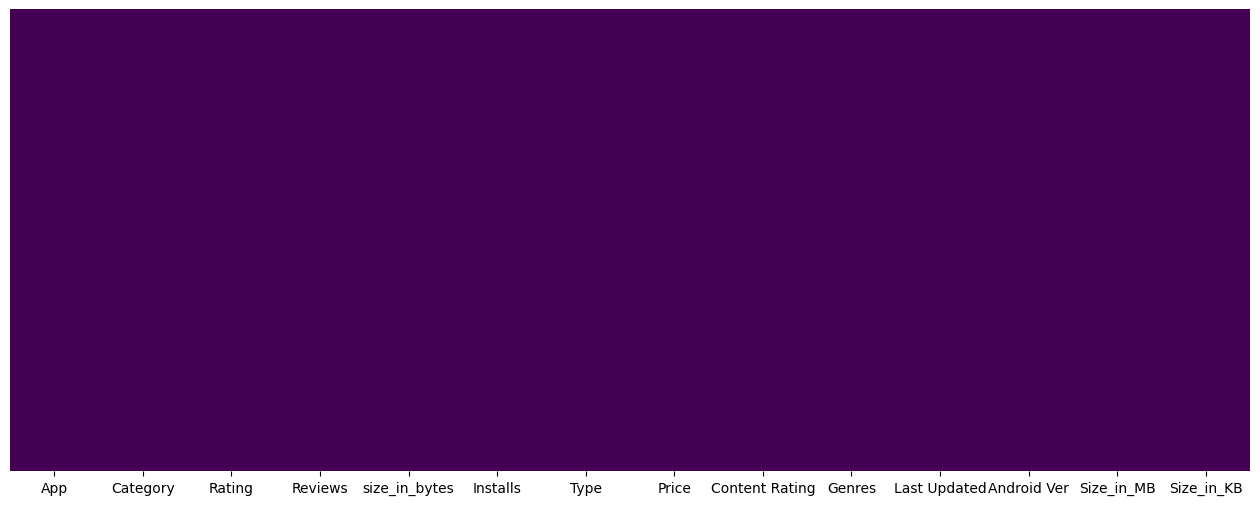

In [73]:
# plot missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [74]:
# Feature ENgineering
bins=[0,1.0,2.0,3.0,4.0,5.0]
labels=['Very Bad','Bad','Okay','Good','Excellent']

In [75]:
df['Rating']=pd.cut(df['Rating'],bins=bins,labels=labels)

In [76]:
# check who many rows have excellent rating
df[df['Rating']=='Excellent'].shape[0]


8274

In [77]:
# print  rows have excellent rating
df[df['Rating']=='Excellent']

,App,Category,Rating,Reviews,size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Size_in_MB,Size_in_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Excellent,159,1.992294e+07,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,4.0.3 and up,19.000000,19456.000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Excellent,87510,9.122611e+06,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,4.0.3 and up,8.700000,8908.800000
3,Sketch - Draw & Paint,ART_AND_DESIGN,Excellent,215644,2.621440e+07,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,4.2 and up,25.000000,25600.000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Excellent,967,2.936013e+06,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,4.4 and up,2.800000,2867.200000
5,Paper flowers instructions,ART_AND_DESIGN,Excellent,167,5.872026e+06,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,2.3 and up,5.600000,5734.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Excellent,38,5.557453e+07,5000,Free,0.0,Everyone,Education,25-Jul-17,4.1 and up,53.000000,54272.000000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Excellent,4,3.774874e+06,100,Free,0.0,Everyone,Education,6-Jul-18,4.1 and up,3.600000,3686.400000
10838,Parkinson Exercices FR,MEDICAL,Excellent,3,9.961472e+06,1000,Free,0.0,Everyone,Medical,20-Jan-17,2.2 and up,9.500000,9728.000000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Excellent,114,2.255921e+07,1000,Free,0.0,Mature,Books & Reference,19-Jan-15,4.1 and up,22030.480308,22030.480308
